<a href="https://colab.research.google.com/github/stevester94/csc500-pandas-practical/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [ ]:
import pandas as pd

In [ ]:
url="https://gist.githubusercontent.com/stevester94/fd96eed30e808e2e74687270ed29effa/raw/2afff06b9d101d9185ce301a0eb624f508d58806/country_codes.csv"
codes=pd.read_csv(url)

# Each entry is a medal given, with all the metadata for the athlete, for that game
url="https://gist.githubusercontent.com/stevester94/fd96eed30e808e2e74687270ed29effa/raw/2afff06b9d101d9185ce301a0eb624f508d58806/olympics.csv"
oo=pd.read_csv(url, skiprows=4) # There's junk in the beginning, so we skip rows

In [ ]:
oo.shape # Rows, Columns

(29216, 10)

In [ ]:
oo.head(n=3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [ ]:
oo.info() # Gives column break downs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [ ]:
oo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [ ]:
# A series is a one dimensional array of indexed data
# Supports ints or strings as index

# Columns are accessed via bracket (or .<col> if you're fancy)
# Accessing a single column returns a series (you can even see it with the type command)
print(type(oo["City"]))
oo["City"]


# df["SeriesName"]
# df.SeriesName # Does not work if the series name has fucked names




#oo.City # This works too

<class 'pandas.core.series.Series'>


0         Athens
1         Athens
2         Athens
3         Athens
4         Athens
          ...   
29211    Beijing
29212    Beijing
29213    Beijing
29214    Beijing
29215    Beijing
Name: City, Length: 29216, dtype: object

In [ ]:
# Can access multiple columns by [[<list of series names>]]
print(type(oo[["City", "Edition", "Athlete"]])) # Note how its a dataframe
oo[["City", "Edition", "Athlete"]]

<class 'pandas.core.frame.DataFrame'>


,City,Edition,Athlete
0,Athens,1896,"HAJOS, Alfred"
1,Athens,1896,"HERSCHMANN, Otto"
2,Athens,1896,"DRIVAS, Dimitrios"
3,Athens,1896,"MALOKINIS, Ioannis"
4,Athens,1896,"CHASAPIS, Spiridon"
...,...,...,...
29211,Beijing,2008,"ENGLICH, Mirko"
29212,Beijing,2008,"MIZGAITIS, Mindaugas"
29213,Beijing,2008,"PATRIKEEV, Yuri"
29214,Beijing,2008,"LOPEZ, Mijain"


# Basic Analysis

## value_counts()

In [ ]:
# How many medals were presented each time the olympics was held

# Basically getting count of each unique value in the column

# Edition being the year the medal was given
print(type(oo["Edition"].value_counts())) # Note how this is a series
oo["Edition"].value_counts().head(5)

<class 'pandas.core.series.Series'>


2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
Name: Edition, dtype: int64

In [ ]:
# Lets try it on gender, with ascending true

oo.Gender.value_counts(ascending=True)

Women     7495
Men      21721
Name: Gender, dtype: int64

## sort_values()

In [ ]:
ath = oo.Athlete.sort_values() # this is a series
ath

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [ ]:
oo.sort_values(by=["Edition", "Athlete"]) # We are sorting by edition, then name (This sorts the whole fucker and is a dataframe)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
82,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,rope climbing,M,Gold
110,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,"team, parallel bars",M,Silver
111,Athens,1896,Gymnastics,Artistic G.,"ATHANASOPOULOS, Spyros",GRE,Men,"team, parallel bars",M,Silver
48,Athens,1896,Cycling,Cycling Road,"BATTEL, Edward",GBR,Men,individual road race,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
28095,Beijing,2008,Equestrian,Dressage,"ZU-SAYN WITTGENSTEIN, Nathalie",DEN,Women,team,X,Bronze
28819,Beijing,2008,Sailing,Sailing,"ZUBARI, Shahar",ISR,Men,RS:X - Windsurfer,M,Bronze
28977,Beijing,2008,Taekwondo,Taekwondo,"ZUBCIC, Martina",CRO,Women,49 - 57 kg,W,Bronze
28387,Beijing,2008,Gymnastics,Rhythmic G.,"ZUEVA, Natalia",RUS,Women,group competition,W,Gold


## Boolean indexing

In [ ]:
oo.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [ ]:
oo.Medal == "Gold" # We get a whole series of trues or falses

0         True
1        False
2        False
3         True
4        False
         ...  
29211    False
29212    False
29213    False
29214     True
29215    False
Name: Medal, Length: 29216, dtype: bool

In [ ]:
# wow pretty cool. The parentheses are required for order of ops
oo[(oo.Medal == "Gold") & (oo.Gender == "Women")] 

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
417,Paris,1900,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,individual,W,Gold
641,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,mixed doubles,X,Gold
649,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,singles,W,Gold
710,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double columbia round (50y - 40y - 30y),W,Gold
713,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double national round (60y - 50y),W,Gold
...,...,...,...,...,...,...,...,...,...,...
29134,Beijing,2008,Weightlifting,Weightlifting,"CAO, Lei",CHN,Women,75kg,W,Gold
29147,Beijing,2008,Wrestling,Wrestling Free.,"HUYNH, Carol",CAN,Women,- 48kg,W,Gold
29155,Beijing,2008,Wrestling,Wrestling Free.,"YOSHIDA, Saori",JPN,Women,48 - 55kg,W,Gold
29163,Beijing,2008,Wrestling,Wrestling Free.,"ICHO, Kaori",JPN,Women,55 - 63kg,W,Gold


## String Handling

In [ ]:
# Using the 'str' attribute lets you do some string based
#   ops on the series
oo[oo.Athlete.str.contains("Florence")]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1843,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,individual,W,Gold
1848,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,pairs,X,Bronze
4173,Paris,1924,Aquatics,Swimming,"BARKER, Florence",GBR,Women,4x100m freestyle relay,W,Silver
8162,Helsinki,1952,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Bronze
9060,Melbourne / Stockholm,1956,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Silver
10849,Tokyo,1964,Athletics,Athletics,"AMOORE-POLLOCK, Judith Florence",AUS,Women,400m,W,Bronze
16817,Los Angeles,1984,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Silver
18287,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,100m,W,Gold
18305,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Gold
18347,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x100m relay,W,Gold


# Basic Plotting

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# What were the sports in the first olympics
fo = oo[oo.Edition == 1896]
fo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Plot Types

Gymnastics       45
Athletics        37
Cycling          16
Shooting         15
Aquatics         11
Tennis           10
Fencing           8
Weightlifting     6
Wrestling         3
Name: Sport, dtype: int64


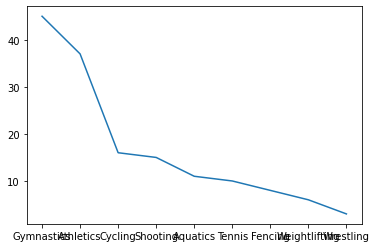

In [ ]:
print(fo.Sport.value_counts())
fo.Sport.value_counts().plot(kind="line")

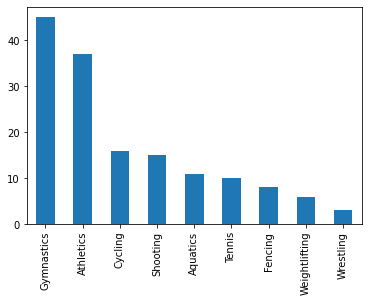

In [ ]:
fo.Sport.value_counts().plot(kind="bar"); # Can suppress the kernel printing a buncha extraneous bullshit with ';'

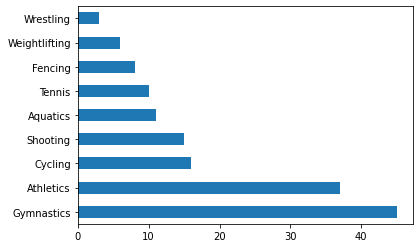

In [ ]:
fo.Sport.value_counts().plot(kind="barh");

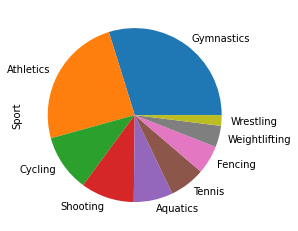

In [ ]:
fo.Sport.value_counts().plot(kind="pie");

## Figure Size

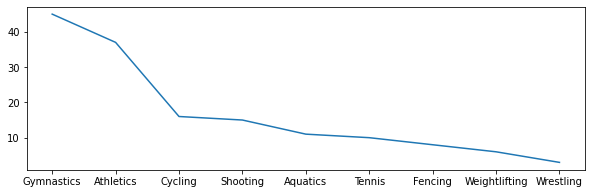

In [ ]:
fo.Sport.value_counts().plot(kind="line", figsize=(10,3));

## Color Maps

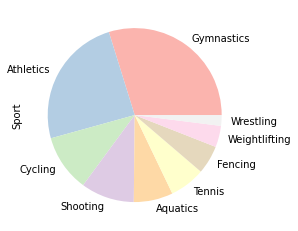

In [ ]:
fo.Sport.value_counts().plot(kind="pie", colormap="Pastel1");

## Seaborn

Is a compliment not a substitute of Matplotlib

Matplotlib great for simple plots

Seaborn great for complex plots (Specifically statistical shit)

In [ ]:
import seaborn as sns

In [ ]:
# How many medals have been won by men and women in the history of the olympics

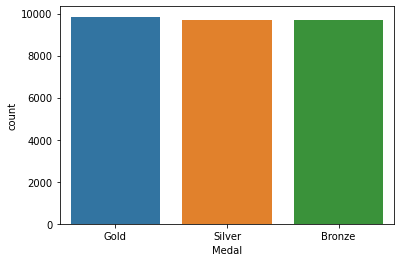

In [ ]:
sns.countplot(x="Medal", data=oo); # Lol boring though!

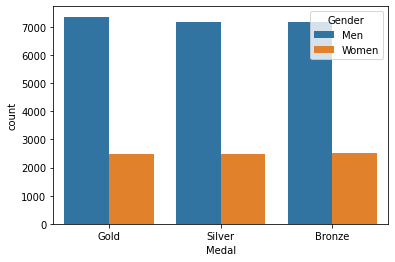

In [ ]:
# Specifying hue basically turns this into categorical graphing
sns.countplot(x="Medal", data=oo, hue="Gender");

# Indexing

Indexing allows you to access a row or column using a label.

In [ ]:
# It has its own type, its not a series or a dataframe
type(oo.index)

pandas.core.indexes.range.RangeIndex

In [ ]:
oo.index[100] # Returns the 100'th elementb

100

In [ ]:
# They are immutable
# oo.index[100] = 5  # This would error

## set_index()
Determines which column is going to be the index for the series

In [ ]:
# we can see that the index is nothing, its like its own series
oo.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [ ]:
# We'll change our index to the Athlete series, and do it in place
oo.set_index("Athlete", inplace=True)
oo.head(3)

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


In [ ]:
# We'll reset the index, and we see its back to normal
oo.reset_index(inplace=True)
oo.head(3)

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
0,"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
1,"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
2,"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


In [ ]:
ath = oo.set_index("Athlete")
ath.head(3)

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


## reset_index()

Resetting a dataframe to its normal integer based index

In [ ]:
ath = oo.set_index("Athlete")
ath.head()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze
"MALOKINIS, Ioannis",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Gold
"CHASAPIS, Spiridon",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Silver


In [ ]:
ath.reset_index(inplace=True)
ath.head(3)

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
0,"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
1,"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
2,"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


## Sorting an index
Reduces time to access

In [ ]:
ath = oo.set_index("Athlete")
ath.sort_index(inplace=True, ascending=False)
ath.head()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ÖSTRAND, Per-Olof",Helsinki,1952,Aquatics,Swimming,SWE,Men,400m freestyle,M,Bronze
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"free rifle, team",M,Silver
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, standing",M,Silver
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, prone",M,Bronze
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, 3 positions",M,Bronze


## loc[]

label based indexing for selection by label

In [ ]:
# oo.loc["BOLT, Usain"] # Key error because we're using the default dataframe which uses an integer index

ath = oo.set_index("Athlete")
ath.loc["BOLT, Usain"] # Interestingly the index does not need to be unique


,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,100m,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,200m,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,4x100m relay,M,Gold


## iloc[]

Integer position based indexing, allows for pythonic slicing

In [ ]:
oo.iloc[1700]

Athlete         RABOT, Pierre
City                   London
Edition                  1908
Sport                 Sailing
Discipline            Sailing
NOC                       FRA
Gender                    Men
Event                      6m
Event_gender                X
Medal                  Bronze
Name: 1700, dtype: object

In [ ]:
# double brackets work
oo.iloc[[1542, 2390, 6000, 15000]]

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
1542,"DUCKETT, Richard Louis",London,1908,Lacrosse,Lacrosse,CAN,Men,lacrosse,M,Gold
2390,"SAASTAMOINEN, Eino",Stockholm,1912,Gymnastics,Artistic G.,FIN,Men,"team, free system",M,Silver
6000,"AGOSTONI, Carlo",Los Angeles,1932,Fencing,Fencing,ITA,Men,épée individual,M,Bronze
15000,"JENSEN, Poul Richard Hoj",Montreal,1976,Sailing,Sailing,DEN,Men,fleet/match race keelboat open (Soling),X,Gold


In [ ]:
# Slicing
oo.iloc[1:4]

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
1,"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
2,"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze
3,"MALOKINIS, Ioannis",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Gold


# Groupby

- splits df into groups
- applies a function
- combines results into df

`agg` is good to check out

In [ ]:
# The groupby object is not a dataframe
# It's more like a dict of dataframes

oo.groupby("Edition")

In [ ]:
type(oo.groupby("Edition"))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
# You can see its basically a key value tuple of (<Edition>, <Dataframe>)
list(oo.groupby("Edition"))[:2]

[(1896,                       Athlete    City  ...  Event_gender   Medal
  0               HAJOS, Alfred  Athens  ...             M    Gold
  1            HERSCHMANN, Otto  Athens  ...             M  Silver
  2           DRIVAS, Dimitrios  Athens  ...             M  Bronze
  3          MALOKINIS, Ioannis  Athens  ...             M    Gold
  4          CHASAPIS, Spiridon  Athens  ...             M  Silver
  ..                        ...     ...  ...           ...     ...
  146             JENSEN, Viggo  Athens  ...             M    Gold
  147       ELLIOTT, Launceston  Athens  ...             M  Silver
  148  CHRISTOPOULOS, Stephanos  Athens  ...             M  Bronze
  149            SCHUMANN, Carl  Athens  ...             M    Gold
  150          TSITAS, Georgios  Athens  ...             M  Silver
  
  [151 rows x 10 columns]),
 (1900,
                                 Athlete   City  ...  Event_gender   Medal
  151                     HALMAY, Zoltan  Paris  ...             M  Bronze
 

## Iterate through a groupby

In [ ]:
for key, df in oo.groupby("Edition"):
  print(key)
  print(type(df))

1896
<class 'pandas.core.frame.DataFrame'>
1900
<class 'pandas.core.frame.DataFrame'>
1904
<class 'pandas.core.frame.DataFrame'>
1908
<class 'pandas.core.frame.DataFrame'>
1912
<class 'pandas.core.frame.DataFrame'>
1920
<class 'pandas.core.frame.DataFrame'>
1924
<class 'pandas.core.frame.DataFrame'>
1928
<class 'pandas.core.frame.DataFrame'>
1932
<class 'pandas.core.frame.DataFrame'>
1936
<class 'pandas.core.frame.DataFrame'>
1948
<class 'pandas.core.frame.DataFrame'>
1952
<class 'pandas.core.frame.DataFrame'>
1956
<class 'pandas.core.frame.DataFrame'>
1960
<class 'pandas.core.frame.DataFrame'>
1964
<class 'pandas.core.frame.DataFrame'>
1968
<class 'pandas.core.frame.DataFrame'>
1972
<class 'pandas.core.frame.DataFrame'>
1976
<class 'pandas.core.frame.DataFrame'>
1980
<class 'pandas.core.frame.DataFrame'>
1984
<class 'pandas.core.frame.DataFrame'>
1988
<class 'pandas.core.frame.DataFrame'>
1992
<class 'pandas.core.frame.DataFrame'>
1996
<class 'pandas.core.frame.DataFrame'>
2000
<class

## groupby functions

In [ ]:
# Number of medals per Edition
oo.groupby("Edition").size()

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [ ]:
# This is all fucked because most of our data is str
# The agg method lets you specify several operations to perform on each group
oo.groupby(["Edition", "NOC", "Medal"]).agg(["min", "max", "count"])

Athlete                           ... Event_gender      
                                        min                      max  ...          max count
Edition NOC Medal                                                     ...                   
1896    AUS Gold               FLACK, Edwin             FLACK, Edwin  ...            M     2
        AUT Bronze            SCHMAL, Adolf            SCHMAL, Adolf  ...            M     2
            Gold              NEUMANN, Paul            SCHMAL, Adolf  ...            M     2
            Silver         HERSCHMANN, Otto         HERSCHMANN, Otto  ...            M     1
        DEN Bronze            JENSEN, Viggo          NIELSEN, Holger  ...            M     3
...                                     ...                      ...  ...          ...   ...
2008    UZB Silver        TANGRIEV, Abdullo           TIGIEV, Soslan  ...            M     2
        VEN Bronze  CONTRERAS RIVERO, Dalia  CONTRERAS RIVERO, Dalia  ...            W     1
        VIE Silver          HOANG, Anh Tuan          HOANG, Anh Tuan  ...            M     1
        ZIM Gold           COVENTRY, Kirsty         COVENTRY, Kirsty  ...            W     1
            Silver         COVENTRY, Kirsty         COVENTRY, Kirsty  ...            W     3

[2356 rows x 21 columns]

In [ ]:
oo.groupby(["Edition", "NOC", "Medal"]).size()

Edition  NOC  Medal 
1896     AUS  Gold      2
         AUT  Bronze    2
              Gold      2
              Silver    1
         DEN  Bronze    3
                       ..
2008     UZB  Silver    2
         VEN  Bronze    1
         VIE  Silver    1
         ZIM  Gold      1
              Silver    3
Length: 2356, dtype: int64

In [ ]:
# We are specifying we want these operations done only on specific series
# Check out how the columns are multi tiered...
oo.groupby(["Edition", "NOC", "Medal"]).agg({"Edition": ["min", "max", "count"]})

Edition            
                       min   max count
Edition NOC Medal                     
1896    AUS Gold      1896  1896     2
        AUT Bronze    1896  1896     2
            Gold      1896  1896     2
            Silver    1896  1896     1
        DEN Bronze    1896  1896     3
...                    ...   ...   ...
2008    UZB Silver    2008  2008     2
        VEN Bronze    2008  2008     1
        VIE Silver    2008  2008     1
        ZIM Gold      2008  2008     1
            Silver    2008  2008     3

[2356 rows x 3 columns]

In [ ]:
# This is actually pretty neat
# It's getting the first year and last year this specific guy got a medal, and then the count of all medals
oo[oo.Athlete == "LEWIS, Carl"].groupby("Athlete").agg({"Edition": ["min", "max", "count"]})

Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

# Reshaping

In [ ]:
# Get all medals from 2008 olympics from 100m and 200m
mw = oo[(oo.Edition == 2008) & ( (oo.Event == "100m") | (oo.Event == "200m") )]
mw

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
27551,"DIX, Walter",Beijing,2008,Athletics,Athletics,USA,Men,100m,M,Bronze
27552,"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,100m,M,Gold
27553,"THOMPSON, Richard",Beijing,2008,Athletics,Athletics,TRI,Men,100m,M,Silver
27554,"FRASER, Shelly-ann",Beijing,2008,Athletics,Athletics,JAM,Women,100m,W,Gold
27555,"SIMPSON, Sherone",Beijing,2008,Athletics,Athletics,JAM,Women,100m,W,Silver
27556,"STEWART, Kerron",Beijing,2008,Athletics,Athletics,JAM,Women,100m,W,Silver
27569,"DIX, Walter",Beijing,2008,Athletics,Athletics,USA,Men,200m,M,Bronze
27570,"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,200m,M,Gold
27571,"CRAWFORD, Shawn",Beijing,2008,Athletics,Athletics,USA,Men,200m,M,Silver
27572,"STEWART, Kerron",Beijing,2008,Athletics,Athletics,JAM,Women,200m,W,Bronze


In [ ]:
g = mw.groupby(["NOC", "Gender", "Discipline", "Event"]).size()
g

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

In [ ]:
# Dont worry, this is just prep
df = g.unstack(["Discipline", "Event"])
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

## stack()

The inner levels of a stack is sorted

returning a 
"If I want to make a dataframe taller, I want stack"
It's kinda like collapsing multiple columns into a single column  
  However, it's operating on multi tier columns, so this is a little weird

In [ ]:
df.stack("Event")

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

## unstack()

In [ ]:
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [ ]:
df.unstack("Gender")

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

## Challenge
Plot the number of gold medals won by the US male and female athletes throughout the history of the Olympics

In [ ]:
df = oo[oo.NOC == "USA"].groupby(["Edition", "Gender"]).size()
print(type(df)) # Note that it's a series
df.head(3)

<class 'pandas.core.series.Series'>


Edition  Gender
1896     Men       20
1900     Men       51
         Women      4
dtype: int64

So why is that a series??

In [ ]:
# It's a multiindex series! And that's why graphing it fucks it up
df.index

MultiIndex([(1896,   'Men'),
            (1900,   'Men'),
            (1900, 'Women'),
            (1904,   'Men'),
            (1904, 'Women'),
            (1908,   'Men'),
            (1912,   'Men'),
            (1920,   'Men'),
            (1920, 'Women'),
            (1924,   'Men'),
            (1924, 'Women'),
            (1928,   'Men'),
            (1928, 'Women'),
            (1932,   'Men'),
            (1932, 'Women'),
            (1936,   'Men'),
            (1936, 'Women'),
            (1948,   'Men'),
            (1948, 'Women'),
            (1952,   'Men'),
            (1952, 'Women'),
            (1956,   'Men'),
            (1956, 'Women'),
            (1960,   'Men'),
            (1960, 'Women'),
            (1964,   'Men'),
            (1964, 'Women'),
            (1968,   'Men'),
            (1968, 'Women'),
            (1972,   'Men'),
            (1972, 'Women'),
            (1976,   'Men'),
            (1976, 'Women'),
            (1984,   'Men'),
            (1

Gender     Men  Women
Edition              
1896      20.0    NaN
1900      51.0    4.0
1904     382.0   12.0


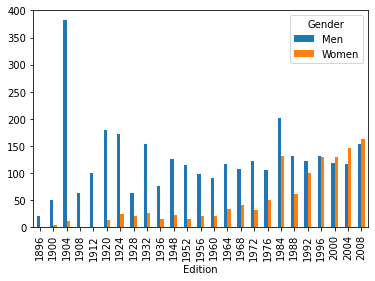

In [ ]:
df = df.unstack("Gender")
print(df.head(3))
df.plot(kind="bar")

# Data Visualization

## heatmaps

In [ ]:
lo = oo[oo.Edition == 2008]
lo.head(3)

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
27174,"GALPERIN, Gleb",Beijing,2008,Aquatics,Diving,RUS,Men,10m platform,M,Bronze
27175,"MITCHAM, Matthew",Beijing,2008,Aquatics,Diving,AUS,Men,10m platform,M,Gold
27176,"ZHOU, Luxin",Beijing,2008,Aquatics,Diving,CHN,Men,10m platform,M,Silver


In [ ]:
# Again its a multiindex, so lets unstack
g = lo.groupby(["NOC", "Medal"]).size()
g


NOC  Medal 
AFG  Bronze     1
ALG  Bronze     1
     Silver     1
ARG  Bronze    31
     Gold      20
               ..
UZB  Silver     2
VEN  Bronze     1
VIE  Silver     1
ZIM  Gold       1
     Silver     3
Length: 188, dtype: int64

In [ ]:
g = g.unstack("Medal", fill_value=0) # If there are non-values, fill it with 0
g.head(3)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
ALG,1,0,1
ARG,31,20,0


In [ ]:
# Note that you can get a column with a single index, that's interesting

g["Bronze"]

NOC
AFG     1
ALG     1
ARG    31
ARM     6
AUS    76
       ..
USA    81
UZB     3
VEN     1
VIE     0
ZIM     0
Name: Bronze, Length: 86, dtype: int64

In [ ]:
# Now we want to sort and change the column list order
g = g.sort_values(["Gold", "Silver", "Bronze"], ascending=False)[["Gold", "Silver", "Bronze"]]

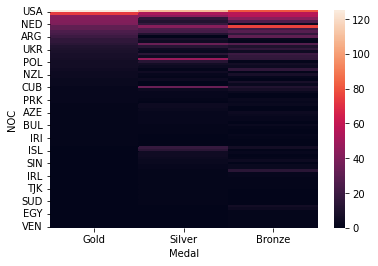

In [ ]:
sns.heatmap(g)

In [ ]:
g = g.transpose()
g

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,ARG,HUN,NOR,BRA,CAN,UKR,JAM,ITA,BLR,ESP,POL,DEN,KEN,ROU,SVK,NZL,ETH,CZE,SUI,GEO,CUB,KAZ,INA,MGL,THA,PRK,MEX,TUR,BEL,ZIM,...,LAT,DOM,POR,IND,IRI,CMR,PAN,TUN,NGR,ISL,SWE,TRI,BAH,GRE,SIN,CRO,LTU,SRB,AUT,IRL,ALG,COL,KGZ,MAR,TJK,CHI,ECU,MAS,RSA,SUD,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,20,16,16,14,11,10,9,8,8,7,6,6,6,5,4,4,4,3,3,3,2,2,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,0,8,5,34,13,5,3,14,5,48,13,6,4,1,5,2,1,4,0,0,34,4,2,2,2,1,0,4,4,3,...,1,1,1,0,0,0,0,0,18,14,5,5,4,3,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,31,3,1,27,10,16,5,20,17,16,1,6,4,16,1,8,2,0,8,3,11,7,3,0,0,3,2,3,0,0,...,1,0,0,2,1,0,0,0,6,0,2,0,1,4,0,3,3,14,2,2,1,1,1,1,1,0,0,0,0,0,0,6,4,1,1,1,1,1,1,1


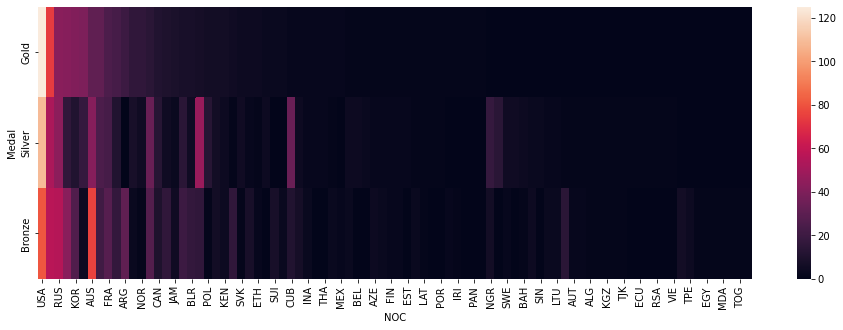

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(g)